# yfinance Tutorial
This is a guide showing what kind of data can be obtained using yfinance.

## Initialization
First, yfinance is imported.

In [1]:
import yfinance as yf
import pandas as pd

## Tickers
The Ticker module allows access to data. A Ticker object can be created for a specfic stock as follows.

In [2]:
msft = yf.Ticker("MSFT")

### Info
The Ticker object has an atribute called info that is a dictionary. Here is everything that the dictionary contains.

In [3]:
msft.info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'averageVolume10days', 'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'trailingPE', 'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 'di

### History
The Ticker object has another attribute called history which gives historical data.

In [4]:
msft.history().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-30,158.99,159.02,156.73,157.59,16348400,0,0
2019-12-31,156.77,157.77,156.45,157.70,18369400,0,0
2020-01-02,158.78,160.73,158.33,160.62,22622100,0,0
2020-01-03,158.32,159.95,158.06,158.62,21116200,0,0
2020-01-06,157.08,159.10,156.51,159.03,20813700,0,0


## High Frequency Prediction
Here, I attempt ot predict a stock price during one day. First, we download the data.

In [5]:
# Your IP must be authorized with the proxy
aapl = yf.download(tickers='AAPL',
                   start='2020-1-24',
                   end='2020-1-25',
                   group_by='ticker',
                   interval='1m',
                   prepost=True,
                   threads=True,
                   proxy='http:190.112.200.72:1212')
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-01-24 04:15:00-05:00,320.33,320.50,320.33,320.50,320.50,0
2020-01-24 04:20:00-05:00,320.50,320.50,320.50,320.50,320.50,0
2020-01-24 04:24:00-05:00,320.66,320.66,320.66,320.66,320.66,0
2020-01-24 04:38:00-05:00,320.52,320.52,320.52,320.52,320.52,0
2020-01-24 04:42:00-05:00,320.56,320.56,320.56,320.56,320.56,0


Columns are added to `aapl` for various quantitiative interpretations of OHLC data.

In [6]:
vol = (aapl['High'] - aapl['Low'])/aapl['High']
p = (aapl['Close'] - aapl['Open'])/aapl['Close']
ol = aapl['Open']/aapl['Low']
oh = aapl['Open']/aapl['High']
cl = aapl['Close']/aapl['Low']
ch = aapl['Close']/aapl['High']
aapl.insert(5, 'Open/Low', ol)
aapl.insert(6, 'Open/High', oh)
aapl.insert(7, 'Close/Low', cl)
aapl.insert(8, 'Close/High', ch)
aapl.insert(9, 'Volatility', vol)
aapl.insert(10, 'Momentum', p)
aapl.head()

,Open,High,Low,Close,Adj Close,Open/Low,Open/High,Close/Low,Close/High,Volatility,Momentum,Volume
Datetime,,,,,,,,,,,,
2020-01-24 04:15:00-05:00,320.33,320.50,320.33,320.50,320.50,1.0,0.99947,1.000531,1.0,0.00053,0.00053,0
2020-01-24 04:20:00-05:00,320.50,320.50,320.50,320.50,320.50,1.0,1.00000,1.000000,1.0,0.00000,0.00000,0
2020-01-24 04:24:00-05:00,320.66,320.66,320.66,320.66,320.66,1.0,1.00000,1.000000,1.0,0.00000,0.00000,0
2020-01-24 04:38:00-05:00,320.52,320.52,320.52,320.52,320.52,1.0,1.00000,1.000000,1.0,0.00000,0.00000,0
2020-01-24 04:42:00-05:00,320.56,320.56,320.56,320.56,320.56,1.0,1.00000,1.000000,1.0,0.00000,0.00000,0


Here is a graph of the stock price.

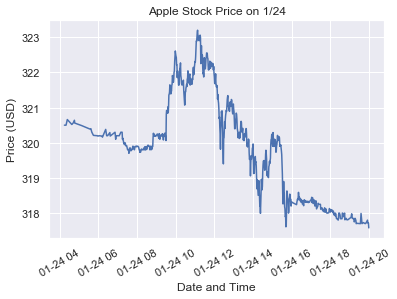

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Get date for title
month = aapl.index[0].month
day = aapl.index[0].day

# Make graph of price
plt.figure()
plt.plot(aapl.index, aapl['Adj Close'])
plt.title('Apple Stock Price on {0}/{1}'.format(month, day))
plt.xlabel('Date and Time')
plt.ylabel('Price (USD)')
plt.xticks(rotation=30);

### Multivariate LSTM Forecasting
Here is an attempt at forecasting the stock prices in the afternoon after training on the data in the morning. First, missing data is dealt with.

In [8]:
import numpy as np

X = aapl.loc[:, 'Adj Close':'Momentum'].values
y = aapl['Adj Close'].values

seq_size = 5 # Number of samples to include to predict next price

# Reshape X 
X_empty = np.zeros((X.shape[0]-seq_size, seq_size, X.shape[1]))
for i in range(X_empty.shape[0]):
    X_empty[i] = X[i:i+seq_size]
X = X_empty

# Adjust y so that the target is the future price
y = np.roll(y, -seq_size)
y = y[:-seq_size]

# Verify that there is no missing data
assert(not np.any(np.isnan(y)))
assert(not np.any(np.isnan(X)))

The data is split into training and test data.

In [9]:
n = int(X.shape[0]*.3)
trainX = X[:n]
trainy = y[:n]
testX = X[n:]
testy = y[n:]

The LSTM is created and fit with the data.

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

# Make network
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
es = EarlyStopping('loss')
fit = model.fit(trainX, trainy, epochs=10,
                batch_size=10,
                validation_data=(testX, testy), verbose=0,
                shuffle=False, callbacks=[es])

Using TensorFlow backend.
C:\Users\mboss\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mboss\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mboss\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mboss\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Here is a visualization of the history of the fit.

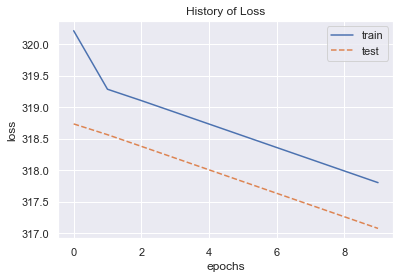

In [11]:
plt.plot(fit.history['loss'], label='train')
plt.plot(fit.history['val_loss'], '--', label='test',)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('History of Loss')
plt.legend();

Here is a visualization of the model prediction alongside the actual stock price

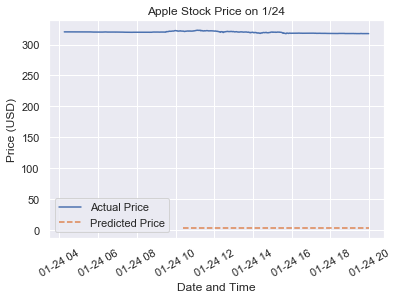

In [12]:
# Predict price
ypred = model.predict(testX)

# Make graph
plt.plot(aapl.index, aapl['Adj Close'], label='Actual Price')
plt.plot(aapl.index[n+seq_size:], ypred, '--', label='Predicted Price')
plt.title('Apple Stock Price on {0}/{1}'.format(month, day))
plt.xlabel('Date and Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=30);

Something has gone really wrong.